# Regresión Lineal (ejemplo)

Basado en: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
# Importamos lo basico
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Hiper-parametros
learning_rate = 0.01
training_epochs = 2000
display_step = 200

In [3]:
# Algunos datos de training
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# Creamos las entradas al grafo de Tensorflow usando 'placeholders'
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Creamos unas variables para los pesos
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construimos un modelo lineal
# Esto representa el "y" estimado de la siguiente manera:
#           y_hat = X * W + b

prediccion = tf.add(tf.multiply(X, W), b)

In [6]:
# Definimos la función de coste en base al Error Cuadrático Medio
coste = tf.reduce_sum(tf.pow(prediccion-Y, 2))/(2*n_samples)

In [7]:
# Utilizamos Gradient Descend como optimizador del coste
optimizador = tf.train.GradientDescentOptimizer(learning_rate).minimize(coste)

In [8]:
# Inicializamos las variables...
init = tf.global_variables_initializer()

Epoch: 0200 coste= 0.099318095 W= 0.333273 b= 0.199481
Epoch: 0400 coste= 0.090640530 W= 0.315073 b= 0.330416
Epoch: 0600 coste= 0.085331894 W= 0.300831 b= 0.432871
Epoch: 0800 coste= 0.082085028 W= 0.289686 b= 0.513042
Epoch: 1000 coste= 0.080099747 W= 0.280966 b= 0.575777
Epoch: 1200 coste= 0.078886397 W= 0.274142 b= 0.624867
Epoch: 1400 coste= 0.078145273 W= 0.268803 b= 0.663275
Epoch: 1600 coste= 0.077692807 W= 0.264625 b= 0.693332
Epoch: 1800 coste= 0.077416800 W= 0.261355 b= 0.716852
Epoch: 2000 coste= 0.077248633 W= 0.258797 b= 0.735258
Optimización completada!
Coste en Training = 0.0772486 W= 0.258797 b= 0.735258 



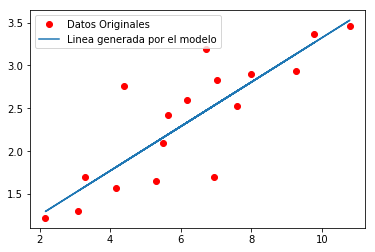

In [9]:
# Entrenamos el modelo segun el numero de epochs definidas
with tf.Session() as sess:
    sess.run(init)

    # Ejecutamos el optimizador con todos los datos de X e Y
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizador, feed_dict={X: x, Y: y})

        # Mostramos el avance por epoch...
        if (epoch+1) % display_step == 0:
            c = sess.run(coste, 
                         feed_dict={X: train_X, Y:train_Y})
            
            print "Epoch:", '%04d' % (epoch+1), "coste=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimización completada!"
    training_cost = sess.run(coste, feed_dict={X: train_X, Y: train_Y})
    print "Coste en Training =", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Ploteamos
    plt.plot(train_X, train_Y, 'ro', label='Datos Originales')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Linea generada por el modelo')
    plt.legend()
    plt.show()